# Gradients

Learning about gradients is a key step in understanding edge detection, which is essential for spotting objects.

An image gradient is a directional change in the intensity or color in an image.

<img src='images/gradient.png'>

Here is mainly Sobel operator will explained.

Gradient can be calculated in a specific direction.

<img src='images/derivatives.png'>

You can find more details about the first-order derivative kernels in the links below:

- https://theailearner.com/tag/cv2-sobel/

- https://dsp.stackexchange.com/questions/44928/what-does-derivative-means-in-image-processing

---

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 0 means directly read it in grayscale
img = cv2.imread('../DATA/sudoku.jpg',0)

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

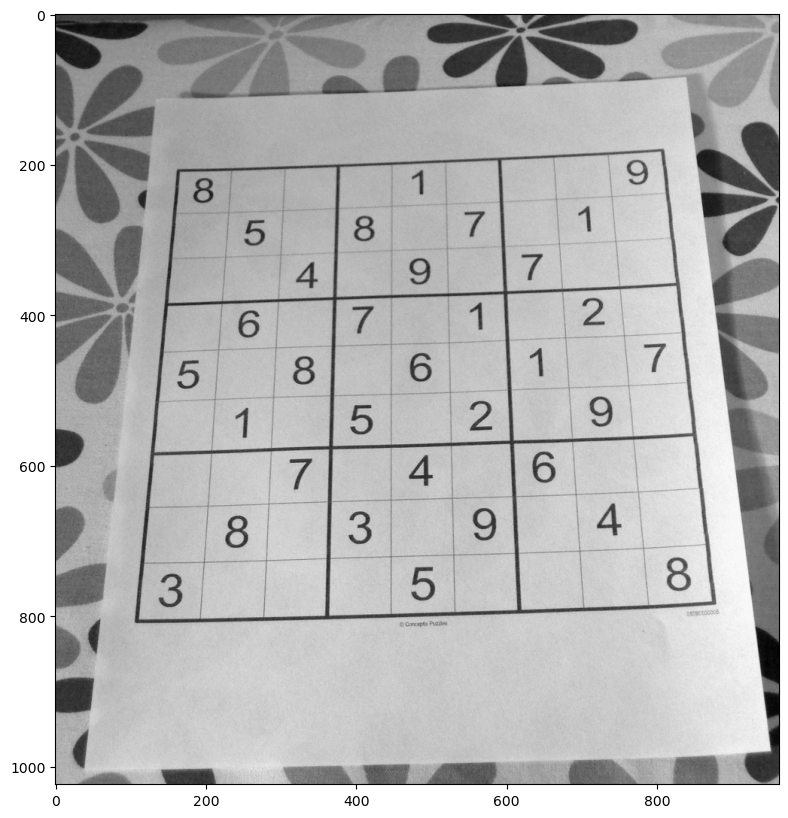

In [4]:
display_img(img)

In [5]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

In [18]:
a = sobelx[200, 300]
print(a)

5.0


Here is a useful link about explanation of **ddepth** (CV_64F, ...):
https://stackoverflow.com/questions/43392956/explanation-for-ddepth-parameter-in-cv2-filter2d-opencv

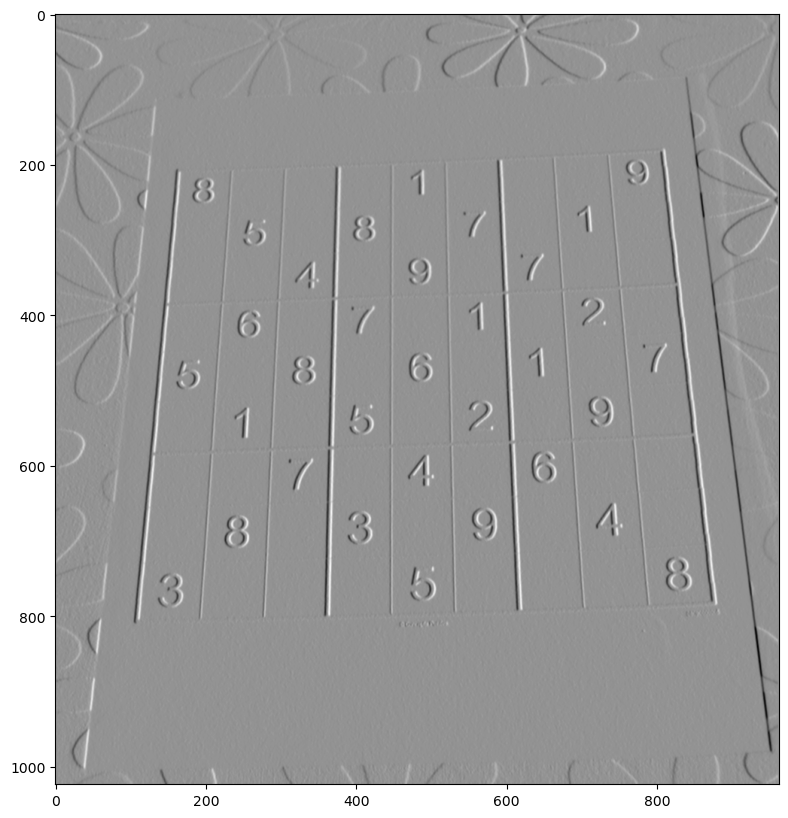

In [13]:
display_img(sobelx)

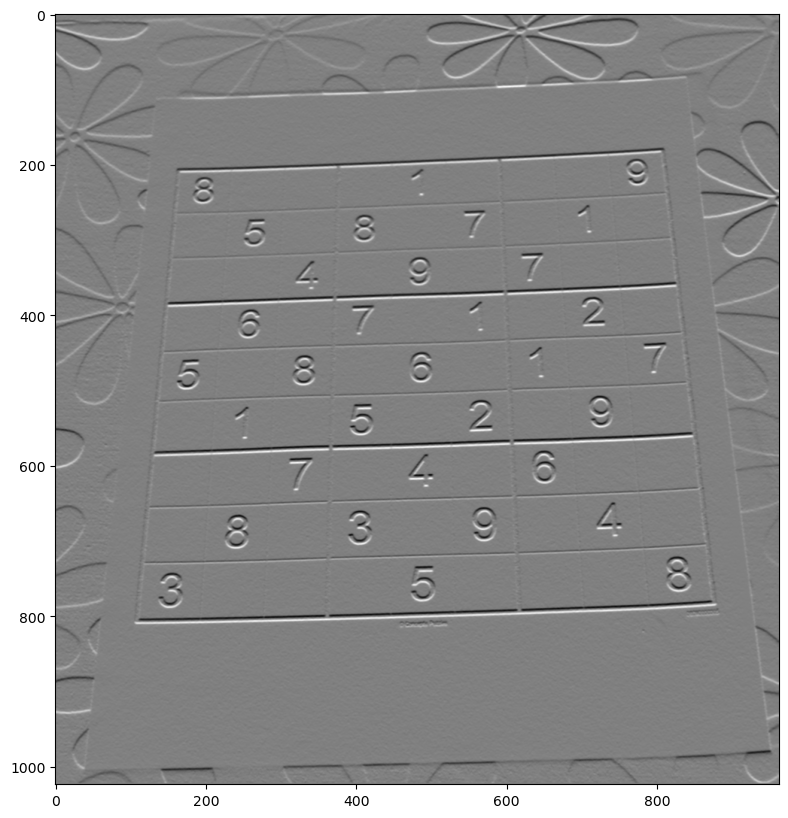

In [14]:
display_img(sobely)

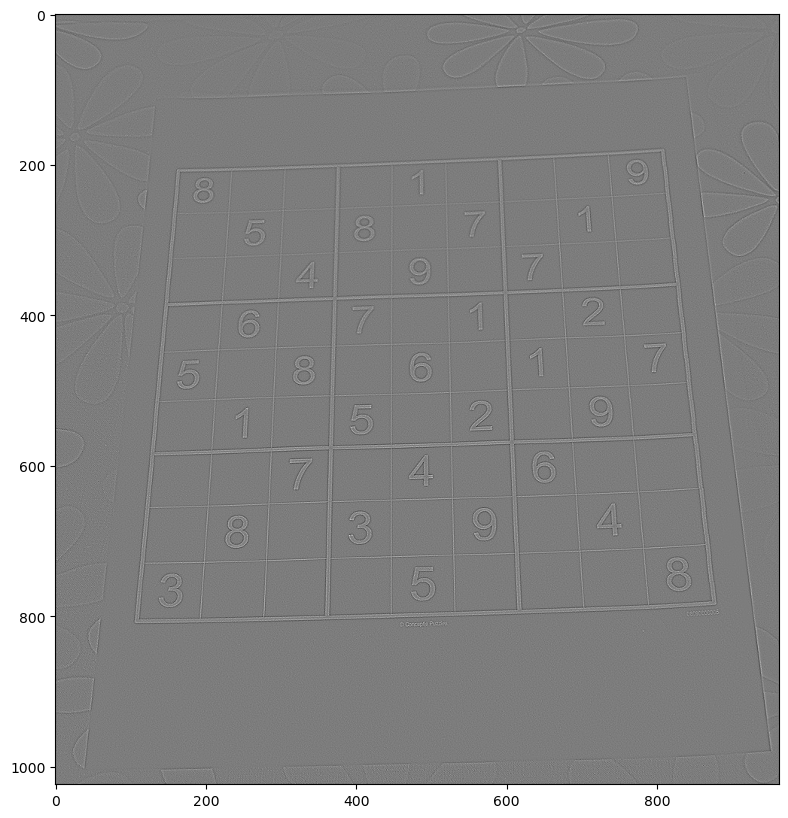

In [15]:
display_img(laplacian)

## Combining Previous Ideas

If we have kind of application like reading image and filling the empty places with numbers, maybe the laplacian result is not satisfactory. So, let's combine previous ideas we have already seen.

### Blending Images

blended shape: (1024, 962)


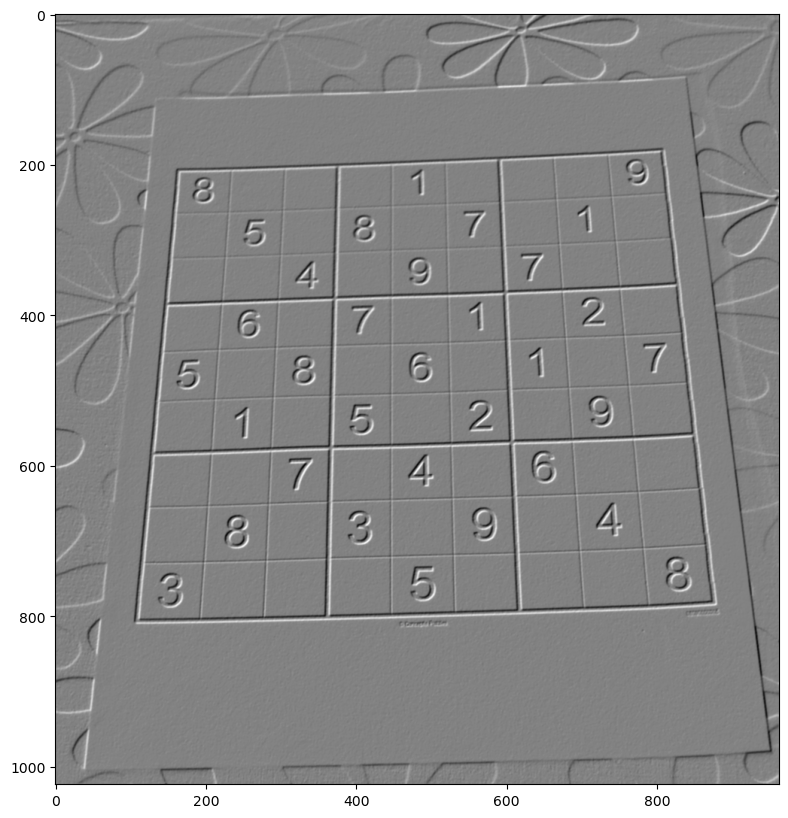

In [18]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
print ('blended shape:', blended.shape)
display_img(blended)

### Morphological Operators

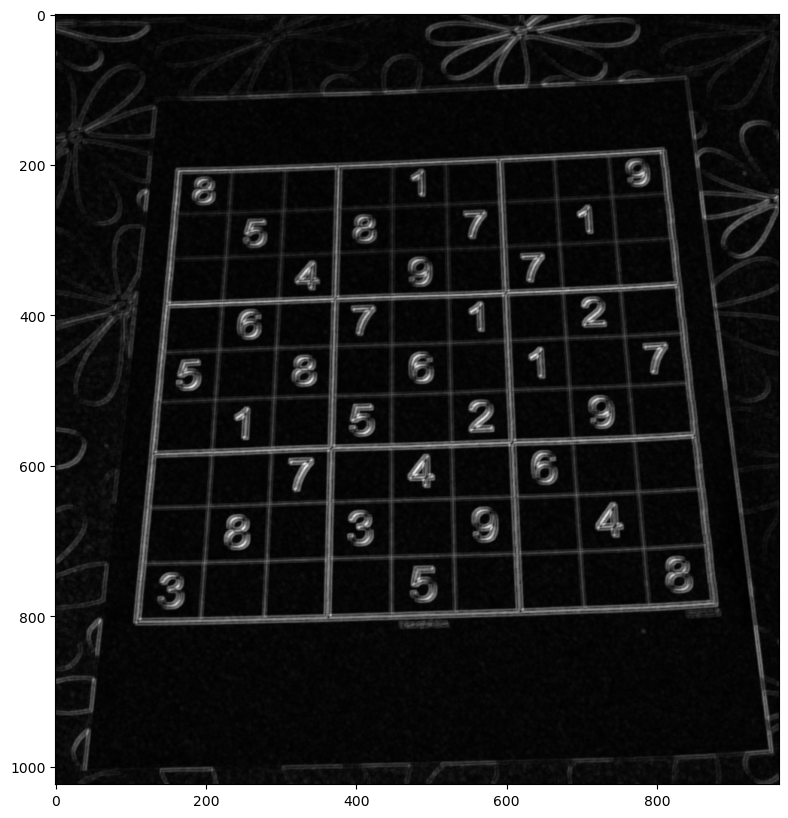

In [21]:
# Feed in the blending result
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

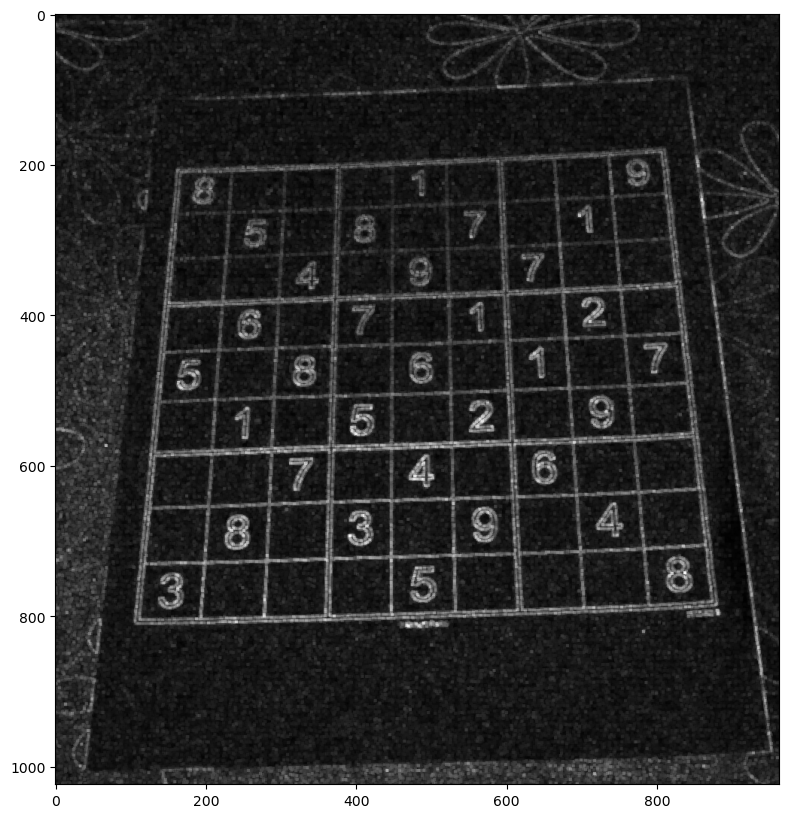

In [22]:
# Feed in the laplacian result
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(laplacian,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

### Thresholding

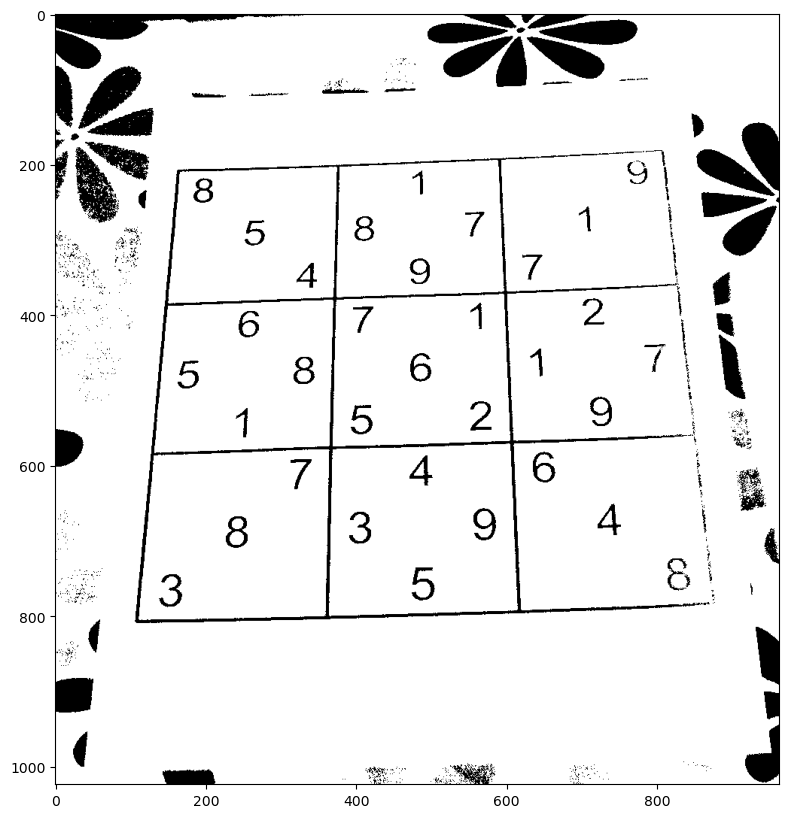

In [25]:
# Threshold = 100
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

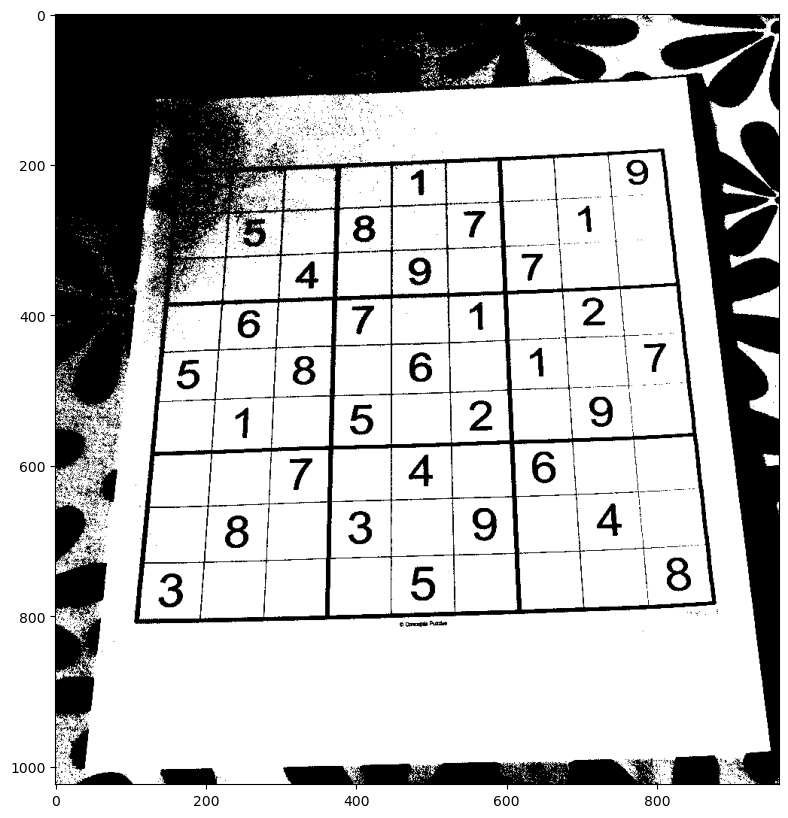

In [29]:
# Threshold = 200
ret,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
display_img(th1)